Importing Modules and Libraries for data handling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV files

In [2]:
members = pd.read_csv("members.csv")
songs = pd.read_csv("songs.csv")
song_extrainfo = pd.read_csv("song_extra_info.csv")
data = pd.read_csv("train.csv")

# Preprocessing

In [3]:
print(data.shape, members.shape, songs.shape, song_extrainfo.shape)

(7377418, 6) (34403, 7) (2296320, 7) (2295971, 3)


Merging dataframes into one

In [3]:
songs_info = pd.merge(songs,song_extrainfo)
all_data = pd.merge(data, songs_info, on='song_id', how='left')
all_data = pd.merge(all_data, members, on='msno', how='left')
all_data.shape

(7377418, 20)

Heatmap representation

<AxesSubplot:>

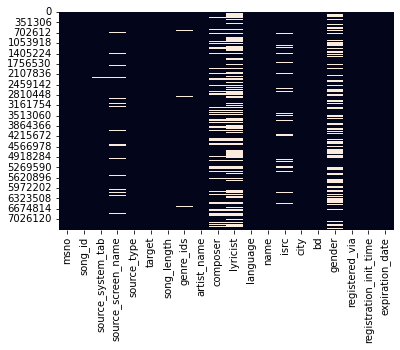

In [5]:
sns.heatmap(all_data.isna(), cbar=False)

Handling missing values 

In [4]:
# missing data percent
total = all_data.isna().sum().sort_values(ascending=False)
percent = 100 * (all_data.isna().sum()/all_data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent (in %)'])
missing_data.head(20)

,Total,Percent (in %)
lyricist,3179542,43.098303
gender,2961479,40.142486
composer,1676694,22.727382
isrc,577963,7.834218
source_screen_name,414804,5.622618
genre_ids,119906,1.625311
source_system_tab,24849,0.336825
source_type,21539,0.291959
language,1605,0.021756
name,1571,0.021295


In [5]:
all_data.source_system_tab.fillna('Others', inplace=True)
all_data.source_screen_name.fillna('Others', inplace=True)
all_data.source_type.fillna('Others', inplace=True)
all_data.gender.fillna('Unknown', inplace=True)
all_data.language.fillna(0.0, inplace=True)

all_data.drop(columns='composer', inplace=True)
all_data.drop(columns='lyricist', inplace=True)
all_data.drop(columns='isrc', inplace=True)

all_data.isna().sum()

msno                           0
song_id                        0
source_system_tab              0
source_screen_name             0
source_type                    0
target                         0
song_length                 1569
genre_ids                 119906
artist_name                 1569
language                       0
name                        1571
city                           0
bd                             0
gender                         0
registered_via                 0
registration_init_time         0
expiration_date                0
dtype: int64

In [6]:
all_data.dropna(inplace=True)
all_data.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
language                  0
name                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [7]:
all_data.shape

(7257510, 17)

# Exploratory Data Analysis (EDA)

Creating dates

In [8]:
# registration_init_time
all_data.registration_init_time = pd.to_datetime(all_data.registration_init_time, format='%Y%m%d', errors='ignore')
all_data['registration_init_time_year'] = all_data['registration_init_time'].dt.year
all_data['registration_init_time_month'] = all_data['registration_init_time'].dt.month
all_data['registration_init_time_day'] = all_data['registration_init_time'].dt.day

# expiration_date
all_data.expiration_date = pd.to_datetime(all_data.expiration_date,  format='%Y%m%d', errors='ignore')
all_data['expiration_date_year'] = all_data['expiration_date'].dt.year
all_data['expiration_date_month'] = all_data['expiration_date'].dt.month
all_data['expiration_date_day'] = all_data['expiration_date'].dt.day

# Dates to category
all_data['registration_init_time'] = all_data['registration_init_time'].astype('category')
all_data['expiration_date'] = all_data['expiration_date'].astype('category')
all_data.shape

(7257510, 23)

##### Distribution of 'Target' variable 

<AxesSubplot:xlabel='target', ylabel='count'>

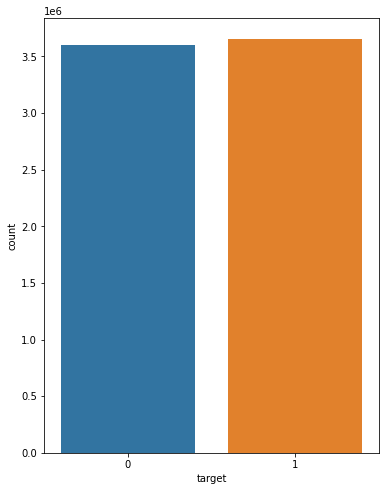

In [14]:
plt.figure(figsize = (6, 8)) 
sns.countplot(x='target', data=all_data)

Conclusion : The Target Variable which is binary ('0' and '1') is almost uniformly balanced. Hence models to be trained on the train dataset will work well.

#####  Gender Plot 

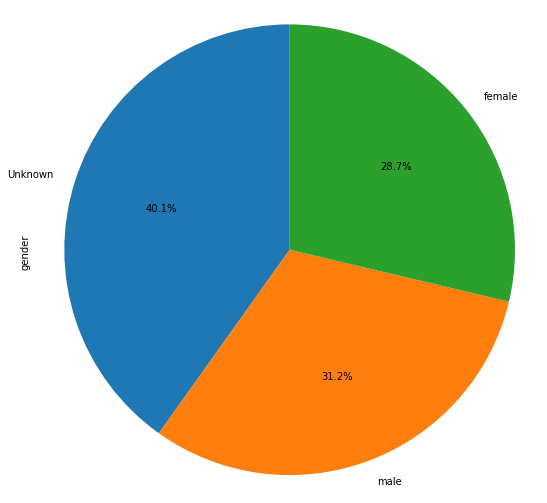

In [15]:
ax= plt.figure(figsize = (9, 9)) 
pp = pd.value_counts(all_data.gender) 
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

Conclusion : The ratio percentage between male and female audience is almost equivalent. Also almost 40% of the audiences have refused to share their gender, thereafter the missing valus of 'gender' are filled with "Unknown' variable.

##### Registration Dates Pattern Over the years (till 2017)

<AxesSubplot:xlabel='registration_init_time_year', ylabel='count'>

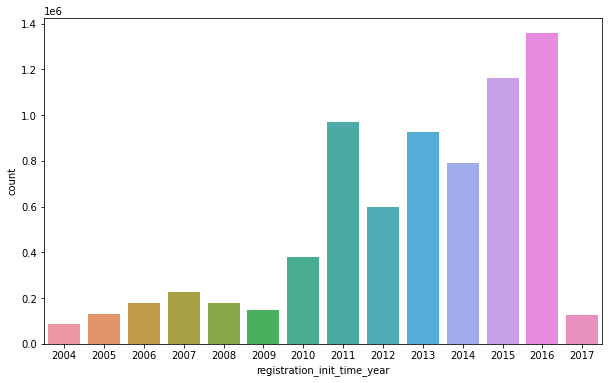

In [16]:
plt.figure(figsize = (10, 6))
sns.countplot(x='registration_init_time_year', data=all_data)

Conclusion : The KK-box platform got popularity since 2011 and saw maximum parrticipation in terms of registration in the year 2016. Although the craze dropped in the next year i.e. 2017 itself

##### Birth Date (Age) Plot

<AxesSubplot:xlabel='bd', ylabel='count'>

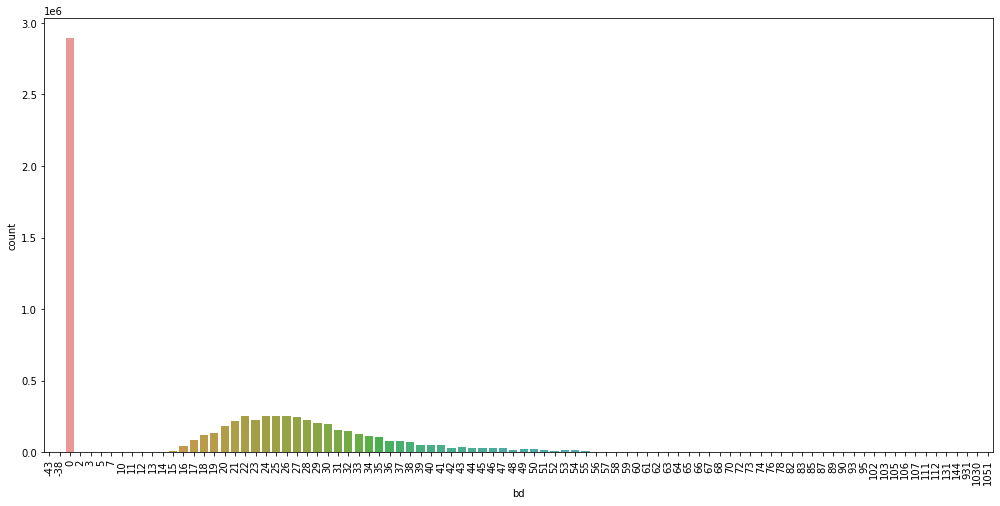

In [17]:
plt.figure(figsize = (17, 8))
plt.xticks(rotation=90)
sns.countplot(x= all_data.bd)

Conclusion : Most of the audiences who shared their age were mostly faulty. The most age figure which was shared was '0' which cant be hold true for an user.

##### Most Listened Artist (Top 10)

<AxesSubplot:xlabel='artist_name'>

C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20523 (\N{CJK UNIFIED IDEOGRAPH-502B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 263

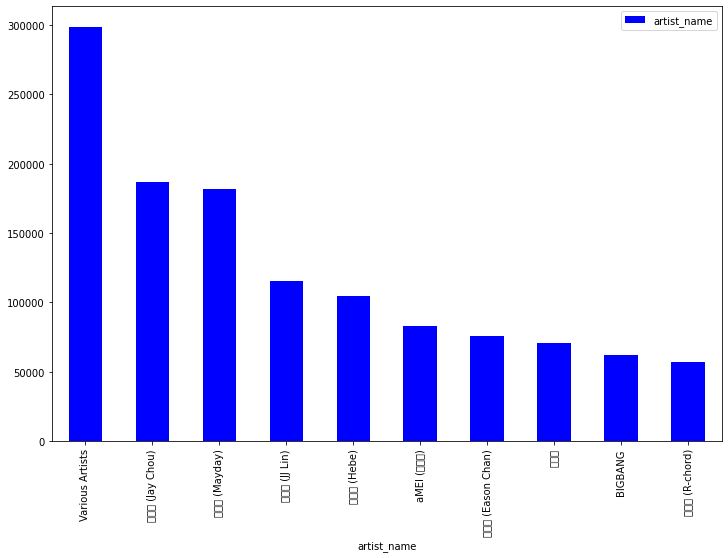

In [28]:
# song artist_name plot top 10
top10 = pd.DataFrame(all_data.groupby('artist_name')['artist_name'].count().nlargest(10))
top10.rename(columns={'artist_name':'artist_name'},inplace=True)
top10.plot(kind='bar',figsize=(12,8),color='blue')

Conclusion : Around 4.1% of the artitst_name variable are unknown and named with 'Various artist'. The most famous artist the kk-box platform are Jay Chou and Mayday engaging 2.5% of the registered auidience .

##### Artist preference among gender

C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21608 (\N{CJK UNIFIED IDEOGRAPH-5468}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26480 (\N{CJK UNIFIED IDEOGRAPH-6770}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20523 (\N{CJK UNIFIED IDEOGRAPH-502B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20116 (\N{CJK UNIFIED IDEOGRAPH-4E94}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\manje\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 263

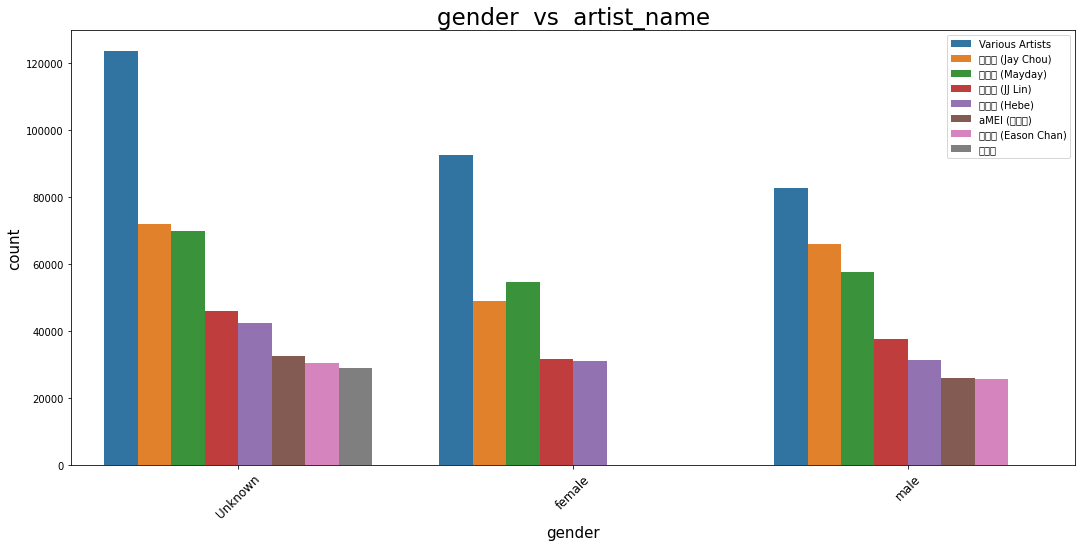

In [20]:
a = pd.DataFrame(all_data.groupby(['gender', 'artist_name']).size().reset_index())
a = a.sort_values(by = 0, ascending = False)
a = a.iloc[:20, :]
a.replace(0, 'NAN', inplace = True)
b = np.array(a.groupby('gender')[0].sum().reset_index())
plt.figure(figsize = (18,8))
ax = sns.barplot(hue= 'artist_name',y = 0, data = a, x = 'gender')
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('gender', fontdict = {'fontsize':15})
plt.ylabel('count', fontdict = {'fontsize':15})
plt.title('gender  vs  artist_name', fontdict = {'fontsize': 23})
plt.legend(loc = 'upper right')
plt.show()

Conclusion : Jay Chou which was the most listened artist in males whereas Mayday was the most listened artist in females.

##### Target vs SourceType

<AxesSubplot:xlabel='source_type', ylabel='count'>

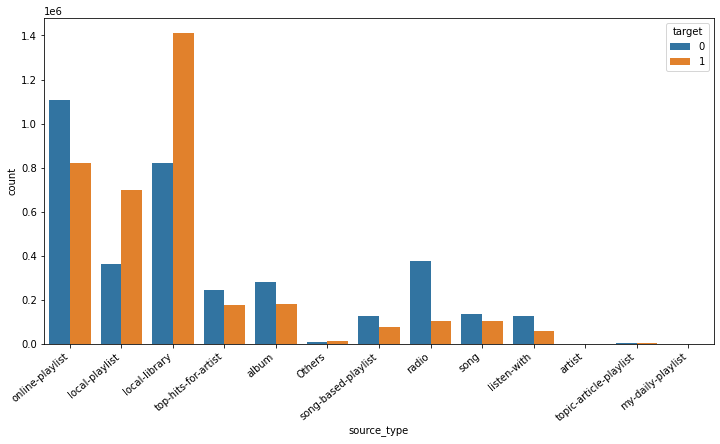

In [24]:
plt.figure(figsize = (12, 6))
plt.xticks(rotation=40,ha='right')
sns.countplot(x='source_type', hue='target', data=all_data)

##### Target vs SourceScreenType

<AxesSubplot:xlabel='source_screen_name', ylabel='count'>

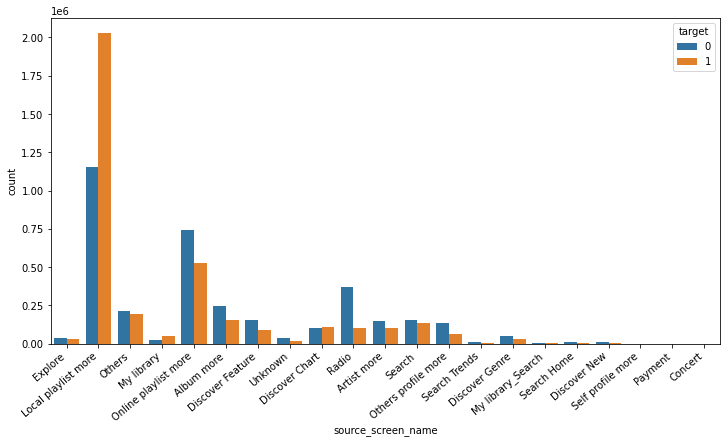

In [25]:
plt.figure(figsize = (12, 6))
plt.xticks(rotation=40, ha='right')
sns.countplot(x=all_data['source_screen_name'], hue='target', data=all_data)

##### Target vs SourceSystemTab

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

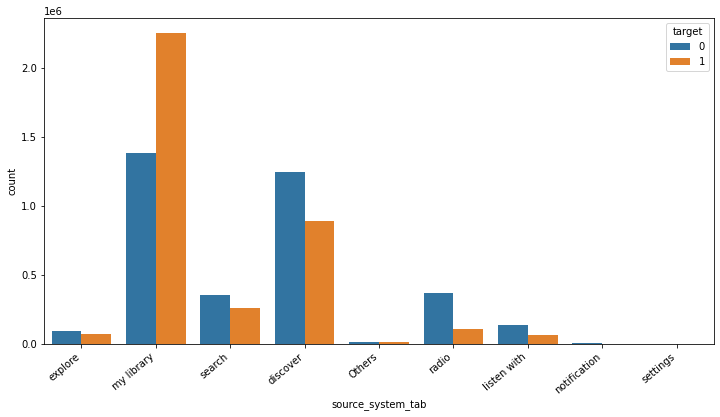

In [26]:
plt.figure(figsize = (12, 6))
plt.xticks(rotation=40, ha='right')
sns.countplot(x='source_system_tab', hue='target', data=all_data)

Conclusion : Most of the registered auidience were seen engaging with the kk-box platform via 'local library'as their entry point to play music. Also the audience listening to music via "my library" has more chances to repeat or play the same song within a duration while the audience listening via "radio" have the least possibility.

##### Genre Id Distribution (Top 10)

<AxesSubplot:xlabel='genre_ids'>

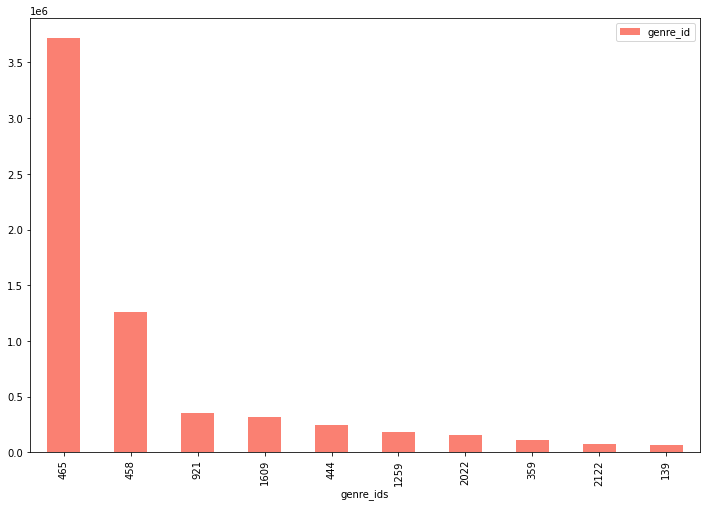

In [29]:
top10 = pd.DataFrame(all_data.groupby('genre_ids')['genre_ids'].count().nlargest(10))
top10.rename(columns={'genre_ids':'genre_id'},inplace=True)
top10.plot(kind='bar',figsize=(12,8),color='salmon')

Conclusion : The most listened genre among the regsitered auidiences is genre id 465.

# Models Methods and Results

Importing scikit-learn modules

In [30]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

Features observation and handling

In [10]:
all_data.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'language', 'name', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date',
       'registration_init_time_year', 'registration_init_time_month',
       'registration_init_time_day', 'expiration_date_year',
       'expiration_date_month', 'expiration_date_day'],
      dtype='object')

In [11]:
features = ['msno', 'song_id', 'source_system_tab', 'source_screen_name',
            'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
            'language', 'name', 'city', 'registered_via',
            'registration_init_time_year', 'expiration_date_year']
all_data[features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7257510 entries, 0 to 7377417
Data columns (total 15 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   msno                         object 
 1   song_id                      object 
 2   source_system_tab            object 
 3   source_screen_name           object 
 4   source_type                  object 
 5   target                       int64  
 6   song_length                  float64
 7   genre_ids                    object 
 8   artist_name                  object 
 9   language                     float64
 10  name                         object 
 11  city                         int64  
 12  registered_via               int64  
 13  registration_init_time_year  int64  
 14  expiration_date_year         int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 885.9+ MB


In [12]:
all_data[features].isna().sum()

msno                           0
song_id                        0
source_system_tab              0
source_screen_name             0
source_type                    0
target                         0
song_length                    0
genre_ids                      0
artist_name                    0
language                       0
name                           0
city                           0
registered_via                 0
registration_init_time_year    0
expiration_date_year           0
dtype: int64

Correlation plot

In [13]:
all_data[features].corr()

,target,song_length,language,city,registered_via,registration_init_time_year,expiration_date_year
target,1.000000,-0.002011,-0.027405,0.011948,0.009701,-0.001790,0.042308
song_length,-0.002011,1.000000,-0.212982,0.005186,0.002906,-0.007623,0.004539
language,-0.027405,-0.212982,1.000000,-0.022314,-0.000521,0.009426,-0.004152
city,0.011948,0.005186,-0.022314,1.000000,0.073648,-0.280145,0.149992
registered_via,0.009701,0.002906,-0.000521,0.073648,1.000000,-0.442610,0.083905
registration_init_time_year,-0.001790,-0.007623,0.009426,-0.280145,-0.442610,1.000000,-0.091728
expiration_date_year,0.042308,0.004539,-0.004152,0.149992,0.083905,-0.091728,1.000000


Encoding and Scaling

In [14]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

all_data['msno'] = enc.fit_transform(all_data['msno'])
all_data['song_id'] = enc.fit_transform(all_data['song_id'])
all_data['source_system_tab'] = enc.fit_transform(all_data['source_system_tab'])
all_data['source_screen_name'] = enc.fit_transform(all_data['source_screen_name'])
all_data['source_type'] = enc.fit_transform(all_data['source_type'])
all_data['genre_ids'] = enc.fit_transform(all_data['genre_ids'].astype('str'))
all_data['artist_name'] = enc.fit_transform(all_data['artist_name'].astype('str'))
all_data['name'] = enc.fit_transform(all_data['name'].astype('str'))

In [15]:
std_scaler = StandardScaler()
all_data['song_length'] = std_scaler.fit_transform(all_data[['song_length']])

In [16]:
all_data[features].head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,name,city,registered_via,registration_init_time_year,expiration_date_year
0,8153,73120,2,7,7,1,-0.575281,285,3193,52.0,50643,1,7,2012,2017
1,17249,218901,4,8,5,1,0.588899,90,31114,52.0,80084,13,9,2011,2017
2,17249,118276,4,8,5,1,-0.293227,90,20806,52.0,56424,13,9,2011,2017
3,17249,23205,4,8,5,1,0.155616,6,26712,-1.0,34190,13,9,2011,2017
4,8153,32627,2,7,7,1,-0.853519,2,4350,52.0,119944,1,7,2012,2017


# Random sampling 10%

Due to large number of rows in the collected dataset and computational limitation , the dataset in sampled into its 10% using Random sampling for models to work well and efficient on the dataset.

In [17]:
train_data = all_data[features].sample(frac = 0.1)
train_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,name,city,registered_via,registration_init_time_year,expiration_date_year
558824,14827,13690,4,8,4,1,-0.377493,344,33648,3.0,205313,1,7,2016,2017
5341987,10720,268462,1,11,7,0,-0.642243,323,8787,31.0,150123,22,4,2015,2017
6253768,17460,237749,4,8,5,1,0.345088,515,31114,3.0,182576,13,9,2011,2017
533236,25470,60328,4,8,4,1,0.628513,344,13704,17.0,53271,1,7,2013,2017
3763969,7422,226983,4,8,4,1,0.751544,344,900,52.0,55165,21,9,2011,2017


## Data Spliting 

In [31]:
X = train_data.drop(columns='target')
y = train_data.target

# 1)    Train - 80% Test - 20%

In [32]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify=y_trainval, random_state=0, test_size=0.2)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(464480, 14) (464480,) (116120, 14) (116120,) (145151, 14) (145151,)


## XGBoost

In [21]:
import xgboost 
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False)

param_grid = {'max_depth':[6,7],'learning_rate':[0.03, 0.3], 'n_estimators':[250,500]}
xgb_grid = GridSearchCV(xgb,param_grid=param_grid, cv=2, return_train_score=True, n_jobs=-1)
xgb_grid.fit(X_trainval, y_trainval)
predicted = xgb_grid.predict(X_test)

print(f"best estimator and parameters: {xgb_grid.best_estimator_}")

best estimator and parameters: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [22]:
print("accuracy on trainval set: %f" % xgb_grid.score(X_trainval, y_trainval))
print("accuracy on test set: %f" % xgb_grid.score(X_test, y_test))

accuracy on trainval set: 0.706660
accuracy on test set: 0.659548


[[44965 27021]
 [22396 50769]]


C:\Users\manje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy: 0.659547643488505
precision: 0.6526417277284998
recall: 0.6938973552928313
f1 score:  0.6726375409890364


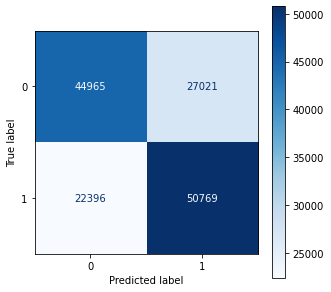

In [23]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(predicted).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['target'],test_calc['predicted'])
print (df_table)

#For graphically representing the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(xgb_grid, X_test, y_test, cmap='Blues', ax=ax)

a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f1 = (2*p*r)/(p+r)

print('accuracy:', a)
print ('precision:', p)
print('recall:', r)
print('f1 score: ', f1)

## LightGBM

In [27]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_trainval, y_trainval)
predicted = lgbm.predict(X_test)

In [28]:
print("accuracy on trainval set: %f" % lgbm.score(X_trainval, y_trainval))
print("accuracy on test set: %f" % lgbm.score(X_test, y_test))

accuracy on trainval set: 0.643302
accuracy on test set: 0.641876


[[44914 27072]
 [24910 48255]]


C:\Users\manje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy: 0.6418763907930363
precision: 0.6406069536819468
recall: 0.6595366637053236
f1 score:  0.6499340031786224


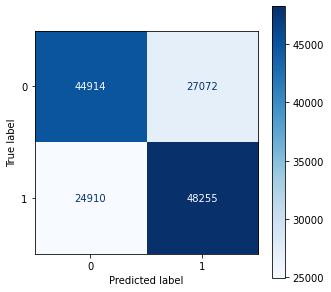

In [29]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(predicted).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['target'],test_calc['predicted'])
print (df_table)

#For graphically representing the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(lgbm, X_test, y_test, cmap='Blues', ax=ax)

a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f1 = (2*p*r)/(p+r)

print('accuracy:', a)
print ('precision:', p)
print('recall:', r)
print('f1 score: ', f1)

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {'max_features': [6,10],'max_depth': [6,10],'n_estimators':[150,250]}

rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=2, return_train_score=True, n_jobs=-1)
rf_grid.fit(X_trainval, y_trainval)
predicted = rf_grid.predict(X_test)

print(f"best estimator and parameters: {rf_grid.best_estimator_}")

rf_results = pd.DataFrame(rf_grid.cv_results_)
rf_results

best estimator and parameters: RandomForestClassifier(max_depth=10, max_features=10, n_estimators=250)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,170.695414,0.097238,6.964688,0.083274,6,6,150,"{'max_depth': 6, 'max_features': 6, 'n_estimat...",0.626545,0.627403,0.626974,0.000429,8,0.628174,0.627685,0.627930,0.000245
1,283.484245,0.119676,11.584210,0.017453,6,6,250,"{'max_depth': 6, 'max_features': 6, 'n_estimat...",0.627323,0.627024,0.627174,0.000150,5,0.628877,0.627475,0.628176,0.000701
2,261.615817,0.066321,6.752759,0.058842,6,10,150,"{'max_depth': 6, 'max_features': 10, 'n_estima...",0.626907,0.627330,0.627118,0.000212,6,0.628367,0.627158,0.627763,0.000605
3,427.517181,0.770919,12.415707,0.322627,6,10,250,"{'max_depth': 6, 'max_features': 10, 'n_estima...",0.626896,0.627320,0.627108,0.000212,7,0.628329,0.627110,0.627720,0.000610
4,251.685388,0.514112,10.448274,0.183006,10,6,150,"{'max_depth': 10, 'max_features': 6, 'n_estima...",0.634227,0.635081,0.634654,0.000427,3,0.643111,0.642818,0.642964,0.000146
5,361.690723,0.181511,11.813089,0.022942,10,6,250,"{'max_depth': 10, 'max_features': 6, 'n_estima...",0.634416,0.634847,0.634631,0.000215,4,0.643741,0.642411,0.643076,0.000665
6,332.639196,0.538545,7.166142,0.001497,10,10,150,"{'max_depth': 10, 'max_features': 10, 'n_estim...",0.635115,0.635184,0.635150,0.000034,2,0.646369,0.644523,0.645446,0.000923
7,337.649958,0.947438,7.745563,0.044368,10,10,250,"{'max_depth': 10, 'max_features': 10, 'n_estim...",0.635229,0.635484,0.635357,0.000127,1,0.646559,0.644575,0.645567,0.000992


In [25]:
print("accuracy on trainval set: %f" % rf_grid.score(X_trainval, y_trainval))
print("accuracy on test set: %f" % rf_grid.score(X_test, y_test))

accuracy on trainval set: 0.641560
accuracy on test set: 0.635828


[[45055 26931]
 [25929 47236]]


C:\Users\manje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy: 0.6358275175506886
precision: 0.6368870252268529
recall: 0.6456092393904189
f1 score:  0.6412184725653626


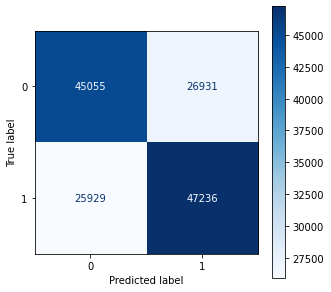

In [26]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(predicted).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['target'],test_calc['predicted'])
print (df_table)

#For graphically representing the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rf_grid, X_test, y_test, cmap='Blues', ax=ax)

a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f1 = (2*p*r)/(p+r)

print('accuracy:', a)
print ('precision:', p)
print('recall:', r)
print('f1 score: ', f1)

# 2)    Train - 75% Test - 25%

In [34]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify=y_trainval, random_state=0, test_size=0.2)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(435450, 14) (435450,) (108863, 14) (108863,) (181438, 14) (181438,)


# XGBoost

In [35]:
import xgboost 
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False)

param_grid = {'max_depth':[6,7],'learning_rate':[0.03, 0.3], 'n_estimators':[250,500]}
xgb_grid = GridSearchCV(xgb,param_grid=param_grid, cv=2, return_train_score=True, n_jobs=-1)
xgb_grid.fit(X_trainval, y_trainval)
predicted = xgb_grid.predict(X_test)

print(f"best estimator and parameters: {xgb_grid.best_estimator_}")

best estimator and parameters: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [36]:
print("accuracy on trainval set: %f" % xgb_grid.score(X_trainval, y_trainval))
print("accuracy on test set: %f" % xgb_grid.score(X_test, y_test))

accuracy on trainval set: 0.708991
accuracy on test set: 0.658958


[[56022 33960]
 [27918 63538]]


C:\Users\manje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


accuracy: 0.6589578809290226
precision: 0.6516851627725697
recall: 0.6947384534639608
f1 score:  0.6725234713210624


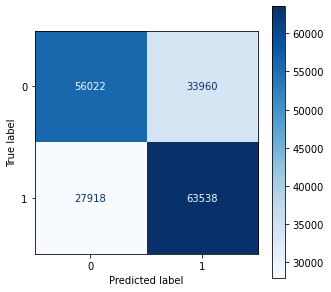

In [37]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(predicted).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['target'],test_calc['predicted'])
print (df_table)

#For graphically representing the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(xgb_grid, X_test, y_test, cmap='Blues', ax=ax)

a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f1 = (2*p*r)/(p+r)

print('accuracy:', a)
print ('precision:', p)
print('recall:', r)
print('f1 score: ', f1)